## Statistics: Visualization

In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nose.tools import assert_equal, assert_is_instance, assert_is, assert_is_not
from numpy.testing import assert_array_equal
from pandas.util.testing import assert_frame_equal

import warnings
warnings.filterwarnings("ignore")

In [113]:
!head -500000 2001.csv > 2001-1.csv

In [114]:
columns = ["Distance", "ActualElapsedTime", "ArrDelay", "Dest"]
df = pd.read_csv('2001-1.csv', encoding="latin-1", usecols=columns)
df = df.dropna()

### 1. Plot: Kernel density estimation

In [115]:
def make_kdeplot(df, col, bw=1):
    '''
    Makes a KDE plot using the specified column in the dataframe.
    
    Params
    -------
    df: a pd.DataFrame object
    col: a column name (a string)
    bw: (optional) bandwidth of the kdeplot
    
    Returns
    -------
    A matplotlib.Axes object
    '''
    
    f, ax = plt.subplots()
    sns.kdeplot(df[col],shade=True,bw=bw)
    ax.set_xlim(0,800)
    ax.set_ylim(0,0.01)
    ax.set_title('Kernel Density Estimation')
    ax.set_ylabel('Density')
    ax.set_xlabel(col)
    return ax

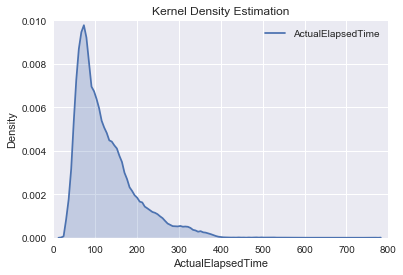

In [116]:
ax = make_kdeplot(df, columns[1])

In [119]:
# assertions
# make a kdeplot
ax = make_kdeplot(df, columns[1])
plt.close()

# check title, axis labels
assert_is_instance(ax, mpl.axes.Axes, msg="Your function should return a matplotlib.axes.Axes object.")
assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is(ax.xaxis.get_label_text(), columns[1], msg="Change the x-axis label to the corresponding column name.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Your plot doesn't have a y-axis label.")

# check data
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
assert_array_equal([min(x), max(x)], [12.0, 782.0])
assert_array_equal([min(y), max(y)], [0.0, 0.0097750694299635222])

# make another kdeplot using a different column
ax2 = make_kdeplot(df, columns[2], bw=5)
plt.close()
assert_is(ax2.xaxis.get_label_text(), columns[2], msg="Change the x-axis label to the corresponding column name.")
x2 = ax2.lines[0].get_xdata()
y2 = ax2.lines[0].get_ydata()
assert_array_equal((min(x2), max(x2)), [-95.0, 1703.0])
assert_array_equal([min(y2), max(y2)], [0.0, 0.024272044285855401])

### 2. Plot: Hexbin plots

In [123]:
def make_hexplot(df, col1, col2):
    '''
    Makes a bivariate hexbin plot.
    
    Params
    -------
    df: a pd.DataFrame object
    col1: a column to put on x-axis
    col2: a column to put on y-axis
    
    Returns
    -------
    A seaborn.JointGrid object
    '''
    
    plot=sns.jointplot(col1, col2,data=df,kind='hex')
    return plot

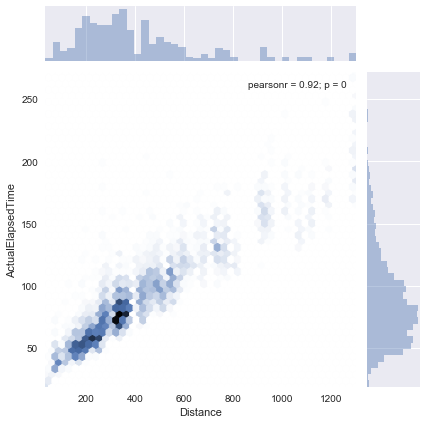

In [124]:
# execute your function; your plot should look similar to the example plot
# use the first 5000 rows in the dataframe to save time
joint = make_hexplot(df[:5000], columns[0], columns[1])

In [125]:
# assertions
# make a jointplot
joint = make_hexplot(df[:5000], columns[0], columns[1])
plt.close()

# check data
assert_is_instance(joint, sns.axisgrid.JointGrid)
assert_array_equal(joint.x, df[:5000][columns[0]])
assert_array_equal(joint.y, df[:5000][columns[1]])

# check histgrams on the sides
assert_equal(len(joint.ax_marg_x.patches), 42)
assert_equal(len(joint.ax_marg_y.patches), 50)

# check the hexbin plot in the middle
hexbin = joint.ax_joint.collections[0].get_array()
assert_equal(len(hexbin), 2465)
assert_array_equal([min(hexbin), max(hexbin)], [0.0, 110.0])

# another jointplot
joint2 = make_hexplot(df[:5000], columns[2], columns[2])
plt.close()
assert_array_equal(joint2.x, df[:5000][columns[2]])
assert_array_equal(joint2.y, df[:5000][columns[2]])
assert_equal(len(joint2.ax_marg_x.patches), 50)
assert_equal(len(joint2.ax_marg_y.patches), 50)
hexbin2 = joint2.ax_joint.collections[0].get_array()
assert_equal(len(hexbin2), 24299)
assert_array_equal([min(hexbin2), max(hexbin2)], [0.0, 368.0])

### 3. Plot: Visualizing pairwise relationships

In [129]:
def make_pairplot(df, huecol):
    '''
    Makes a pairplot of multiple pairwise bivariate distributions in a dataset.
    
    Params
    -------
    df: a pd.DataFrame object. All columns will be used in the pairplot
    hue: a column to map plot aspects to different colors
    
    Returns
    -------
    A seaborn.PairGrid object
    '''
    
    g=sns.PairGrid(data=df,hue=huecol)
    g = g.map_diag(sns.kdeplot)
    g = g.map_offdiag(plt.scatter)
    g = g.add_legend()
    return g

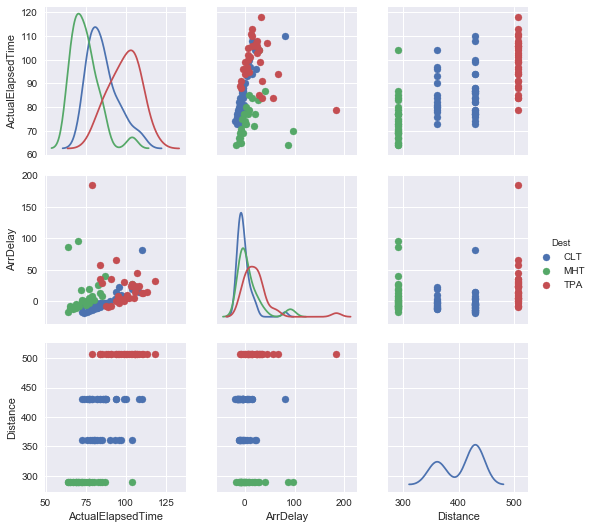

In [130]:
pair = make_pairplot(df[:100], columns[3])

In [131]:
# assertions
# make a pairplot
pair = make_pairplot(df[:100], columns[3])
plt.close()

# check data
assert_is_instance(pair, sns.axisgrid.PairGrid)
assert_frame_equal(pair.data, df[:100])

# check legend
assert_equal(pair.hue_names, ['CLT', 'MHT', 'TPA'])

# check diagonal kde plots
for d in pair.diag_axes:
    assert_equal(len(d.lines), 3, msg="The nondiagonal subplots should be KDE plots with 3 lines each.")
l1 = pair.diag_axes[0].lines[0].get_xydata()
assert_array_equal([np.min(l1), np.max(l1)], [8.5613566514262593e-05, 122.32653970546926])
l2 = pair.diag_axes[1].lines[2].get_xydata()
assert_array_equal([np.min(l2), np.max(l2)], [-37.440954535726235, 212.44095453572623])
l3 = pair.diag_axes[2].lines[0].get_xydata()
assert_array_equal([np.min(l3), np.max(l3)], [0.00023714991522256253, 480.86510129524527])

# check nondiagonal scatter plots
for i in range(3):
    for j in range(3):
        if i != j:
            assert_is_instance(pair.axes[i][j].collections[0], mpl.collections.PathCollection, 
                               msg="The nondiagonal subplots should be scatter plots.")